# Desafío - Dimensionalidad Máquinas PCA

## Autor:Pablo Veloz

# Análisis de Componentes Principales y Clustering


## 1.- Importe las librerías correspondientes junto con el conjunto de datos
* Necesitará el método `pd.read_excel` para poder ingerir los datos en formato `xlsx`.
* El argumento `skiprows` le permite indicarle al lector que salte las primeras `n` líneas del archivo a leer
* Recuerde definir una variable que sirva como semilla aleatoria!.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')
df = pd.read_excel("Residential-Building-Data-Set.xlsx", skiprows = 1)
np.random.seed(16123)

In [49]:
df.head(5)

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


Obs: Se observa a START YEAR como númerica ordinal.

## 2.- Data Wrangling & Feature Engineering
1. Elimine las columnas `START QUARTER` y `COMPLETION QUARTER`, por ahora las ignoraremos para nuestro análisis.

Nuestro primero objetivo será realizar una transformación/extracción de las componentes principales de la matriz de datos, el objetivo de esto es encontrar aquellas componentes principales que permiten explicar un cierto porcentaje de la variación total de los datos.

2. Sabiendo que PCA en rigor solo debiese ser aplicado a variables numéricas de rango (recordar la diferencia entre variables ordinales y nominales), realice un split entrenamiento y test, apartando un conjunto de test correspondiente al 30$%$ de la muestra. Considere que nuestra variable objetivo va a ser `COMPLETION YEAR`. Lo que haremos con el conjunto de train será pasarlo por la transformación PCA.

3. Antes de pasar el conjunto de datos, elimine todos los registros en los que `START YEAR` o `COMPLETION YEAR` es NaN.

4. Escale la matriz de datos con la que se entrenará la transformación. Recuerde: Nunca debemos entrenar la transformación con todos los datos del dataset, de lo contrario, estaríamos pasando información del conjunto de test al modelo.
> a. Instancie un objeto `StandarScaler` y entrenelo con el conjunto de entrenamiento
>
> b. Cree una nueva variable y asignele la transformación del conjunto de entrenamiento pasado por `StandarScaler`.
>
> c. Cree una nueva variable y asignele la transformación del conjunto de test pasado por `StandarScaler`.

5. Transforme la matriz de atributos mediante PCA, para esto, realice los siguientes pasos:
> a. Instancie un objeto `PCA` y entrenelo con la matriz de datos escalada __de entrenamiento__. Dentro de los argumentos del método, indique que requiere un número de componentes igual al $0.99$ de la variación total de los datos, además, indique `svd_solver = "full"`.
>
> b. Cree una nueva variable y asignele la transformación del conjunto de entrenamiento pasado por `PCA`.
>
> c. Cree una nueva variable y asignele la transformación del conjunto de test pasado por `PCA`.


## Quitar Columna Start Quarter y Completion Quarter

In [50]:
df = df.drop("START QUARTER",axis = "columns");

In [51]:
df = df.drop("COMPLETION QUARTER", axis = "columns")

In [52]:
df.head(5)

,START YEAR,COMPLETION YEAR,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,85,1,3150.0,920.0,598.5,190,1010.84,16,1200,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,89,1,7600.0,1140.0,3040.0,400,963.81,23,2900,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,81,1,4800.0,840.0,480.0,100,689.84,15,630,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,73,1,685.0,202.0,13.7,20,459.54,4,140,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,90,1,3000.0,800.0,1230.0,410,631.91,13,5000,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


2. Sabiendo que PCA en rigor solo debiese ser aplicado a variables numéricas de rango (recordar la diferencia entre variables ordinales y nominales), realice un split entrenamiento y test, apartando un conjunto de test correspondiente al 30$%$ de la muestra. Considere que nuestra variable objetivo va a ser `COMPLETION YEAR`. Lo que haremos con el conjunto de train será pasarlo por la transformación PCA.
> * _Observación:_ En mi caso particular, creo que prefiero dejar la dimensión de `START YEAR` fuera de la transformación pues la considero una variable más que todo ordinal.

In [53]:
y_vec = df.loc[:, 'COMPLETION YEAR']
X_mat = df.loc[:, df.columns != "COMPLETION YEAR"]

In [54]:
df.dropna(inplace = True)

In [55]:
from sklearn.model_selection import train_test_split
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.30, random_state=22021991)
print(" Dimension Matriz de Entrenamiento:")
X_train_pre.shape

 Dimension Matriz de Entrenamiento:


(260, 106)

In [56]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train_pre.loc[:, X_train_pre.columns != "START YEAR"]
X_test_numeric = X_test_pre.loc[:, X_test_pre.columns != "START YEAR"]

std_scalar = StandardScaler().fit(X_train_numeric)

std_xtest = std_scalar.transform(X_test_numeric)

std_xtrain = std_scalar.transform(X_train_numeric)



In [57]:
from sklearn.decomposition import PCA

pca_transform = PCA(n_components = .99, svd_solver = "full").fit(std_xtrain)

In [58]:
std_xtrain_pca_scaler = pca_transform.transform(std_xtrain)
std_xtest_pca_scaler = pca_transform.transform(std_xtest)

In [59]:
std_xtrain.shape

(260, 105)

### __Disminuyendo dimensionalidad se Obtuvo__

In [60]:
print("Dimension Matriz Scaler PCA")
std_xtrain_pca_scaler.shape

Dimension Matriz Scaler PCA


(260, 24)

### `De 105 columnas a 24`

In [61]:
X_train = pd.DataFrame(std_xtrain_pca_scaler)
X_train["START YEAR"] = X_train_pre.loc[:, "START YEAR"].values
x_train_nsy = pd.DataFrame(std_xtrain_pca_scaler)
x_test = pd.DataFrame(std_xtest_pca_scaler)
x_test_nsy = pd.DataFrame(std_xtest_pca_scaler)
x_test["START YEAR"] = X_test_pre.loc[:,"START YEAR"].values

In [62]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,START YEAR
0,-3.025531,-4.081541,-1.004121,-3.759627,0.039101,-1.273425,1.011854,0.538219,0.483365,0.470176,...,0.325912,1.051353,0.081861,0.459099,0.444370,-0.161070,-0.743233,-0.271993,0.278301,81
1,-8.361551,0.181494,1.722242,0.261695,1.248687,-1.186235,0.693766,-0.365307,0.573074,-0.953259,...,-0.294717,0.389417,0.548397,-0.104449,-0.506583,-0.275849,0.193496,-0.497252,-0.686889,77
2,-3.976086,-3.664806,-1.173270,-2.947527,0.249126,2.174077,-0.600989,0.678671,-0.983437,0.019923,...,0.271947,-0.695932,-0.300960,-0.113402,-0.547390,0.235736,0.095122,0.314202,-0.170016,80
3,-7.635057,1.534821,1.750369,-0.972382,-0.575413,-1.638136,-0.672773,0.537005,0.557884,-1.800402,...,0.039730,0.238392,0.115257,-0.437147,-0.079134,0.098531,0.224683,-0.241600,-0.022646,78
4,20.525201,-2.481656,0.861502,5.592530,0.057503,-0.916427,3.101729,-0.442158,-0.235474,-2.939918,...,-0.743555,-0.235246,-0.320014,0.738822,0.906352,-0.330481,1.095960,-0.436344,0.761959,88


## 3.- Estudio de las componentes encontradas

1. Si decidió dejar la columna `START YEAR` fuera de la transformación, ahora agreguela como una nueva columna a las matrices de datos transformadas del punto anterior.

2. Ralice un gráfico de barras donde se muestre:
> a. En orden decreciente, la variación explicada por cada componente principal.
>
> b. La variación explicada acumulada a medida que se agregan componentes principales.

__Nota:__ Es normal que la curva de variación explicada no parta de 0.

Necesitará llamar a los argumentos `components_` y `explained_variance_`.


In [63]:
pca_transform.components_

array([[ 0.01148168,  0.0165651 ,  0.01664383, ...,  0.11757389,
         0.07913029,  0.09385816],
       [-0.00097706,  0.07279189,  0.05455124, ..., -0.00037508,
         0.03539373,  0.05111253],
       [ 0.06246465, -0.01159945,  0.00880932, ...,  0.02255775,
        -0.069228  , -0.06268945],
       ...,
       [-0.27230908, -0.00039499, -0.19690747, ...,  0.08421622,
        -0.17774977,  0.01864615],
       [ 0.14603033,  0.01115535,  0.11422516, ..., -0.06554511,
         0.0913351 , -0.0886231 ],
       [ 0.10293609, -0.03807076,  0.06201901, ...,  0.09129895,
         0.04423105, -0.02862558]])

In [64]:
pca_transform.explained_variance_

array([69.54226307,  7.23499798,  4.97078594,  4.55113395,  3.57976559,
        2.8177592 ,  1.9337004 ,  1.64694474,  1.53402578,  1.1224593 ,
        0.98806165,  0.83152576,  0.65718511,  0.55277576,  0.5139097 ,
        0.33538688,  0.30097857,  0.26252114,  0.22958735,  0.1941783 ,
        0.18573784,  0.16604944,  0.14652288,  0.12090884])

In [65]:
(pca_transform.explained_variance_ + 1)

array([70.54226307,  8.23499798,  5.97078594,  5.55113395,  4.57976559,
        3.8177592 ,  2.9337004 ,  2.64694474,  2.53402578,  2.1224593 ,
        1.98806165,  1.83152576,  1.65718511,  1.55277576,  1.5139097 ,
        1.33538688,  1.30097857,  1.26252114,  1.22958735,  1.1941783 ,
        1.18573784,  1.16604944,  1.14652288,  1.12090884])

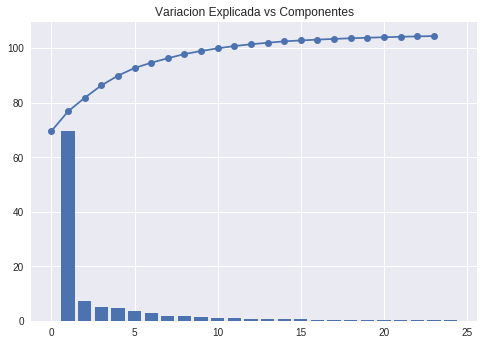

In [66]:
plt.bar(range(1, len(pca_transform.explained_variance_) + 1),pca_transform.explained_variance_)
plt.title("Variacion Explicada vs Componentes")
plt.plot(pca_transform.explained_variance_.cumsum(),"o-")

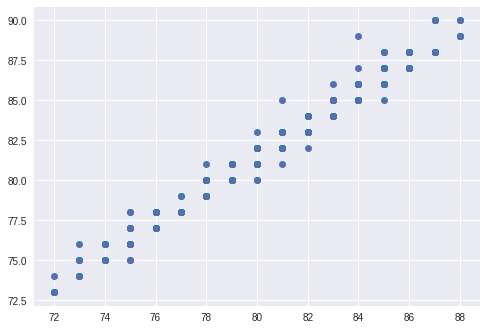

In [67]:
plt.plot(df['START YEAR'], df['COMPLETION YEAR'], 'o');

## 4.- Modelamiento
1. Realice una regresión lineal para poder predecir `COMPLETION YEAR`.
2. Reporte la cantidad de varianza explicada por el modelo ($R^2$).
3. Realice un dotplot entre `COMPLETION YEAR` y `START YEAR`, le hace sentido el valor que observó de varianza explicada?.

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train,y_train)
lin_reg_preds = lin_reg.predict(x_test)

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Con Columna: \"Start Year\"\n")
print("R^2 score: {}".format(r2_score(y_test,lin_reg_preds)))
print("Mean absolute error {}".format(mean_absolute_error(y_test,lin_reg_preds)))
print("Mean squared error {}".format(mean_squared_error(y_test,lin_reg_preds)))

Con Columna: "Start Year"

R^2 score: 0.9957444561186749
Mean absolute error 0.22890034246615226
Mean squared error 0.07133430065928868


In [70]:
#sin "START YEAR"

lin_reg_pre = LinearRegression().fit(x_train_nsy,y_train)

lin_reg_preds_pre = lin_reg_pre.predict(x_test_nsy)

print("Sin Columna: \"Start Year\"\n")
print("R2 score: {}".format(r2_score(y_test,lin_reg_preds_pre)))
print("Mean absolute error {}".format(mean_absolute_error(y_test,lin_reg_preds_pre)))
print("Mean squared error {}".format(mean_squared_error(y_test,lin_reg_preds_pre)))

Sin Columna: "Start Year"

R2 score: 0.9948220507565536
Mean absolute error 0.24778287207147187
Mean squared error 0.08679628231574596


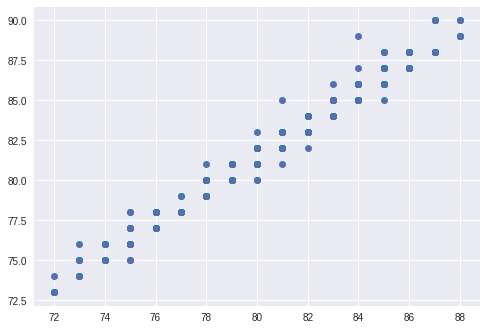

In [71]:
plt.plot(df['START YEAR'], df['COMPLETION YEAR'], 'o');

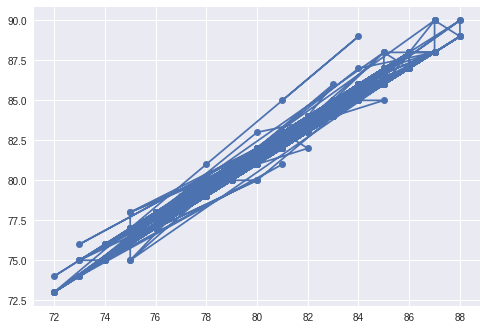

In [72]:
plt.plot(df['START YEAR'], df['COMPLETION YEAR'], 'o-');

## 5.- KMeans Clustering

Realice clustering sobre el conjunto de datos, en este caso, clustering lo ocuparemos para __descubrir información__, no para predecir algún valor.

1. A partir del dataset original (completo), escalelo con `StandarScaler`. Por qué necesitamos esto?
2. Instancie un objeto `KMeans` del módulo `sklearn.cluster`.
3. Entrene `KMeans` sobre el conjunto de datos:
> * Aplique `KMeans` con 2, 5, 7 y 10 n_clusters.
